<a href="https://colab.research.google.com/github/GopikaJL/-Time-Series-Analysis-for-Air-Passenger-Demand-Prediction/blob/main/forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 128: ARIMA II - Stationarity in Time Series

---

---

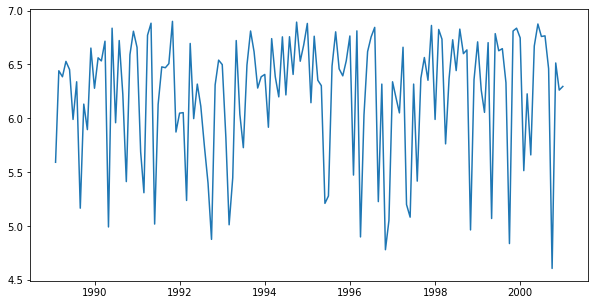

In [ ]:
# Perform log transformation of dataset and plot the transformed data.
plt.figure(figsize = (10, 5))
dummy_log = np.log(dummy_in_df)
plt.plot(dummy_log)
plt.show()

In [ ]:
#  Create a custom function to check whether the data is stationary or not.
def test_stationarity(timeseries):

  # Determine rolling statistics
  mov_average = timeseries.rolling(window = 12).mean()
  mov_std = timeseries.rolling(window = 12).std()

  # Plot rolling statistics
  plt.figure(figsize = (10, 5))
  plt.plot(timeseries, color='blue', label = 'Original')
  plt.plot(mov_average, color='red', label = 'Rolling Mean')
  plt.plot(mov_std, color='black', label = 'Rolling Std')
  plt.legend()
  plt.title('Rolling Mean & Standard Deviation')
  plt.show()

  # Perform Dickey–Fuller test
  print('Results of Dickey Fuller Test:')
  dummy_adf = adfuller(timeseries['Sales'])
  print('ADF Statistic:', dummy_adf[0])
  print('p-value: ', dummy_adf[1])
  print('Critical Values:')
  for key, value in dummy_adf[4].items():
	  print(key,":", value)

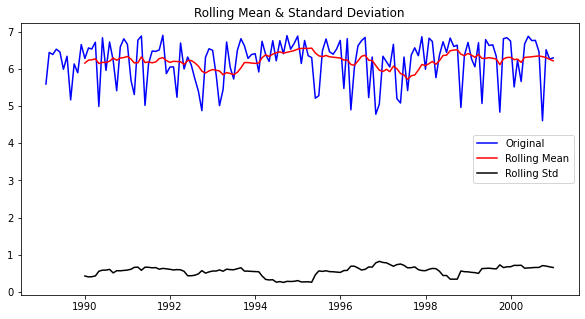

Results of Dickey Fuller Test:
ADF Statistic: -11.666756649335177
p-value:  1.87615339747297e-21
Critical Values:
1% : -3.4769274060112707
5% : -2.8819726324025625
10% : -2.577665408088415


In [ ]:
# Check the stationarity of the log transformed data
test_stationarity(dummy_log)

In [ ]:
#  Perform first-order differencing
first_or_diff_df = dummy_in_df - dummy_in_df.shift(1)  # y′t = yt − yt−1
first_or_diff_df

,Sales
Month,
1989-01-31,NaN
1989-02-28,359.0
1989-03-31,-34.0
1989-04-30,91.0
1989-05-31,-50.0
...,...
2000-08-31,-228.0
2000-09-30,-539.0
2000-10-31,574.0


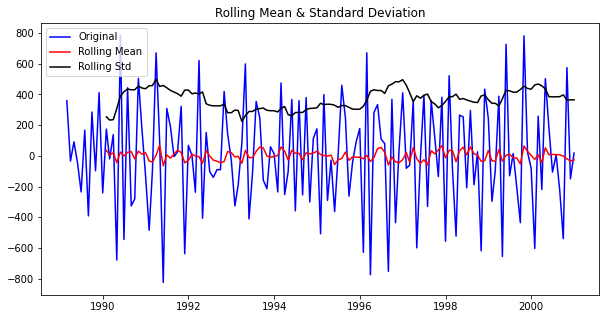

Results of Dickey Fuller Test:
ADF Statistic: -8.186201866299555
p-value:  7.887535475444414e-13
Critical Values:
1% : -3.4793722137854926
5% : -2.8830370378332995
10% : -2.578233635380623


In [ ]:
 Remove NaN values and check stationarity of the time series data
first_or_diff_df.dropna(inplace = True)
test_stationarity(first_or_diff_df)

In [ ]:
#  Perform second-order differencing.
sec_or_diff_df = first_or_diff_df - first_or_diff_df.shift(1)    # y''t = y't − y't−1
sec_or_diff_df

,Sales
Month,
1989-02-28,NaN
1989-03-31,-393.0
1989-04-30,125.0
1989-05-31,-141.0
1989-06-30,-185.0
...,...
2000-08-31,-233.0
2000-09-30,-311.0
2000-10-31,1113.0


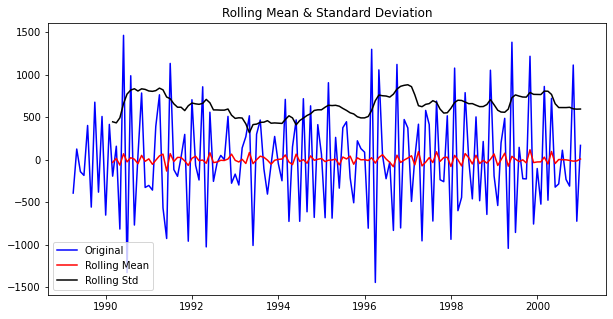

Results of Dickey Fuller Test:
ADF Statistic: -7.137412658516196
p-value:  3.392660170050077e-10
Critical Values:
1% : -3.482087964046026
5% : -2.8842185101614626
10% : -2.578864381347275


In [ ]:
#  Remove NaN values and check stationarity of the time series data
sec_or_diff_df.dropna(inplace = True)
test_stationarity(sec_or_diff_df)

In [ ]:
# Perform seasonal differencing.
seasonal_diff_df = dummy_in_df - dummy_in_df.shift(12)    # y''t = y't − y't−m
seasonal_diff_df.head(20)

,Sales
Month,
1989-01-31,NaN
1989-02-28,NaN
1989-03-31,NaN
1989-04-30,NaN
1989-05-31,NaN
1989-06-30,NaN
1989-07-31,NaN
1989-08-31,NaN
1989-09-30,NaN


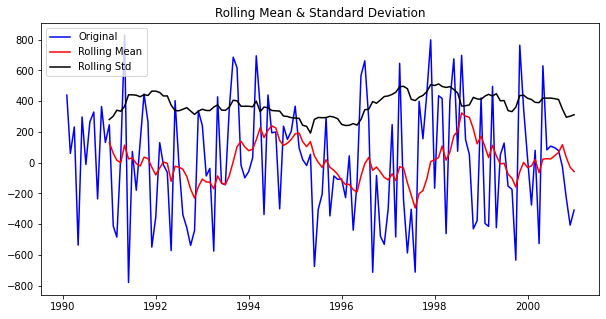

Results of Dickey Fuller Test:
ADF Statistic: -4.977422371115781
p-value:  2.459349837551863e-05
Critical Values:
1% : -3.486055829282407
5% : -2.8859430324074076
10% : -2.5797850694444446


In [ ]:
#  Remove NaN values and check stationarity of the time series data
seasonal_diff_df.dropna(inplace = True)
test_stationarity(seasonal_diff_df)

In [ ]:
#  Split the time series data into train and test sets.
train = dummy_in_df.iloc[:len(dummy_in_df) - 12]
test = dummy_in_df.iloc[len(dummy_in_df) - 12 :]
print(train.shape)
print(test.shape)

(132, 1)
(12, 1)


In [ ]:
#  Fit an ARIMA model using train set
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima_model import ARIMA
model_1 = ARIMA(train, order = (5, 0, 1)) # p= 5, d = 0, q = 1
arima_train = model_1.fit()

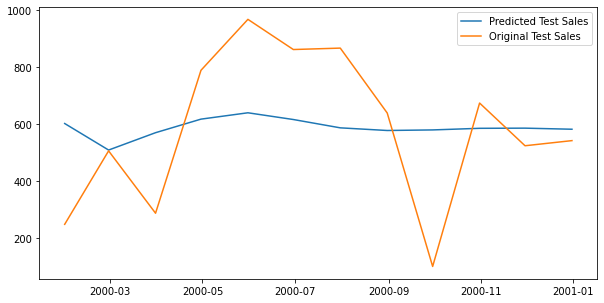

In [ ]:
#  Perform prediction using 'predict()' function.
start_index = len(train)
end_index = len(dummy_in_df) - 1

# Predictions against the test set
pred_test = arima_train.predict(start = start_index, end = end_index) # start = 132, end = 143

# Plot predictions and actual values
plt.figure(figsize=(10, 5))
plt.plot(pred_test, label = 'Predicted Test Sales')
plt.plot(test['Sales'], label = 'Original Test Sales')
plt.legend()
plt.show()


In [ ]:
#  Perform one-step out-of sample forecast
single_step = arima_train.forecast()
single_step

(array([602.10918238]),
 array([249.00395301]),
 array([[ 114.07040247, 1090.14796229]]))

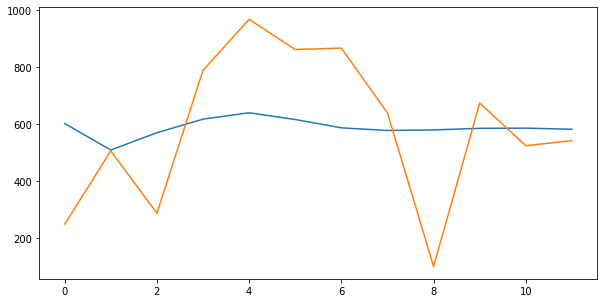

In [ ]:
# Perform forecast for test set using 'forecast()' function
forecast = arima_train.forecast(steps = 12)[0]     # Store only the first element of this tuple.

# Plot forecast and actual values
plt.figure(figsize=(10, 5))
plt.plot(forecast, label = 'Forecasted Test Sales')
plt.plot(test.values, label = 'Original Test Sales' )
plt.show()

In [ ]:
#  Evaluate accuracy of the model by calculating MAE and RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:", mean_absolute_error(test, pred_test))
print("RMSE:", np.sqrt(mean_squared_error(test, pred_test)))

MAE: 199.76233965736222
RMSE: 246.39809385626313


MAE: 211.31046145724153
RMSE: 248.82331151324723


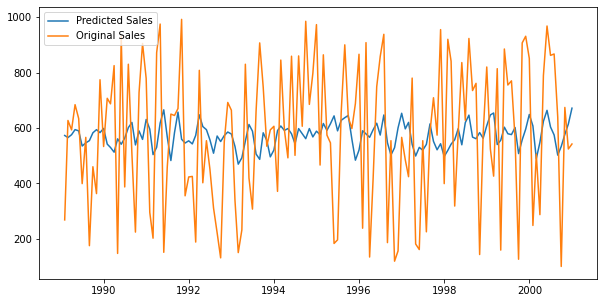

In [ ]:
#  Build ARIMA model using entire dataset and plot prediction.
import warnings
warnings.filterwarnings("ignore")

arima_model = ARIMA(dummy_in_df, order = (5, 0, 1)).fit() # p= 5, d = 0, q = 1

# Predict using `predict()` function with start = 0 and end = (total observations - 1)
pred = arima_model.predict(0, len(dummy_in_df) - 1)   # start = 0, end = 143

# Print MAE and RMSE values
print("MAE:", mean_absolute_error(dummy_in_df, pred))
print("RMSE:", np.sqrt(mean_squared_error(dummy_in_df, pred)))

# Plot predictions and actual values
plt.figure(figsize=(10, 5))
plt.plot(pred, label = 'Predicted Sales')
plt.plot(dummy_in_df['Sales'], label = 'Original Sales')
plt.legend()
plt.show()

In [ ]:
# Perform prediction for new values.
plt.figure(figsize=(10, 5))
start_index = len(dummy_in_df)
end_index = start_index + 12
forecast = arima_model.predict(start = start_index, end = end_index)  # start = 144, end = 156
print(forecast)

2001-01-31    647.859669
2001-02-28    549.722958
2001-03-31    575.951403
2001-04-30    563.313836
2001-05-31    561.933484
2001-06-30    577.691614
2001-07-31    573.029993
2001-08-31    574.291832
2001-09-30    572.210689
2001-10-31    570.633640
2001-11-30    572.068656
2001-12-31    572.393384
2002-01-31    572.927996
Freq: M, dtype: float64


<Figure size 720x360 with 0 Axes>